## Crisp DM Process
1. Business Undertsanding 
2. Data Understanding
3. Data Preparation
4. Modeling

# What is the business need

The dataset contains data from immscout24 it container data from: 2018-09-22, 2019-05-10 and 2019-10-08. 
The data set contains most of the important properties, such as living area size, the rent, both base rent as well as total rent (if applicable), the location (street and house number, if available, ZIP code and state), type of energy etc. It also has two variables containing longer free text descriptions: description with a text describing the offer and facilities describing all available facilities, newest renovation etc. The date column was added to give the time of scraping.

We want to analyze: 
Did price to rent change over time ?
Is there a difference in the rent on different areas ?
Does living space, number of rooms, picture count, or year contructed have a correlation with the base rent ?
Does the latter change in different regions Hamburg, Berlin, Münich, Bavaria, Bavaria without Münich ?


# Data Understanding - What data do we have / need? Is it clean?



## Explore the Data

### Prepare Data
import librapries

In [154]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from lib.helper import get_number_of_zero_values
from lib.helper import get_city_or_region

In [155]:
df = pd.read_csv("immo_data.csv")

df.head()

,regio1,serviceCharge,heatingType,telekomTvOffer,telekomHybridUploadSpeed,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,scoutId,noParkSpaces,firingTypes,hasKitchen,geo_bln,cellar,yearConstructedRange,baseRent,houseNumber,livingSpace,geo_krs,condition,interiorQual,petsAllowed,street,streetPlain,lift,baseRentRange,typeOfFlat,geo_plz,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,garden,livingSpaceRange,regio2,regio3,description,facilities,heatingCosts,energyEfficiencyClass,lastRefurbish,electricityBasePrice,electricityKwhPrice,date
0,Nordrhein_Westfalen,245.00,central_heating,ONE_YEAR_FREE,NaN,False,False,6,4.62,10.0,840.0,1965.0,96107057,1.0,oil,False,Nordrhein_Westfalen,True,2.0,595.0,244,86.00,Dortmund,well_kept,normal,NaN,Sch&uuml;ruferstra&szlig;e,Schüruferstraße,False,4,ground_floor,44269,4.0,181.4,1.0,3.0,4,True,4,Dortmund,Schüren,Die ebenerdig zu erreichende Erdgeschosswohnun...,Die Wohnung ist mit Laminat ausgelegt. Das Bad...,NaN,NaN,NaN,NaN,NaN,May19
1,Rheinland_Pfalz,134.00,self_contained_central_heating,ONE_YEAR_FREE,NaN,False,True,8,3.47,10.0,NaN,1871.0,111378734,2.0,gas,False,Rheinland_Pfalz,False,1.0,800.0,NaN,89.00,Rhein_Pfalz_Kreis,refurbished,normal,no,no_information,NaN,False,5,ground_floor,67459,3.0,NaN,NaN,NaN,3,False,4,Rhein_Pfalz_Kreis,Böhl_Iggelheim,Alles neu macht der Mai – so kann es auch für ...,NaN,NaN,NaN,2019.0,NaN,NaN,May19
2,Sachsen,255.00,floor_heating,ONE_YEAR_FREE,10.0,True,True,8,2.72,2.4,1300.0,2019.0,113147523,1.0,NaN,False,Sachsen,True,9.0,965.0,4,83.80,Dresden,first_time_use,sophisticated,NaN,Turnerweg,Turnerweg,True,6,apartment,1097,3.0,NaN,3.0,4.0,3,False,4,Dresden,Äußere_Neustadt_Antonstadt,Der Neubau entsteht im Herzen der Dresdner Neu...,"* 9 m² Balkon\n* Bad mit bodengleicher Dusche,...",NaN,NaN,NaN,NaN,NaN,Oct19
3,Sachsen,58.15,district_heating,ONE_YEAR_FREE,NaN,False,True,9,1.53,40.0,NaN,1964.0,108890903,NaN,district_heating,False,Sachsen,False,2.0,343.0,35,58.15,Mittelsachsen_Kreis,NaN,NaN,NaN,Gl&uuml;ck-Auf-Stra&szlig;e,Glück-Auf-Straße,False,2,other,9599,3.0,86.0,3.0,NaN,3,False,2,Mittelsachsen_Kreis,Freiberg,Abseits von Lärm und Abgasen in Ihre neue Wohn...,NaN,87.23,NaN,NaN,NaN,NaN,May19
4,Bremen,138.00,self_contained_central_heating,NaN,NaN,False,True,19,2.46,NaN,903.0,1950.0,114751222,NaN,gas,False,Bremen,False,1.0,765.0,10,84.97,Bremen,refurbished,NaN,NaN,Hermann-Henrich-Meier-Allee,Hermann-Henrich-Meier-Allee,False,5,apartment,28213,3.0,188.9,1.0,NaN,3,False,4,Bremen,Neu_Schwachhausen,Es handelt sich hier um ein saniertes Mehrfami...,Diese Wohnung wurde neu saniert und ist wie fo...,NaN,NaN,NaN,NaN,NaN,Feb20


We have following columns: 

|Key|Value|
|-|-|
|regio1| The location of the house or flat |
|serviceCharge| Monthly costs of electricity, internet|
|heatingType| Type of heating|
|telekomTvOffer| Is payed TV included if so which offer|
|telekomHybridUploadSpeed| How fast is the hybrid inter upload speed|
|newlyConst| Is the building newly constructed|
|balcony| Does the object have a balcony|
|picturecount| How many pictures were uploaded to the listing|
|pricetrend| I could not find ta decription for that therefore i will not include it |
|totalRent| Total rent (usually a sum of base rent, service charge and heating cost|
|yearConstructed| construction year|
|scoutId| immoscout Id| 
|noParkSpaces| number of parking spaces| 
|firingTypes| main energy sources, separated by colon| 
|hasKitchen| |
|geo_bln| bundesland (state), same as regio1|
|cellar|Is a cellar available|
|yearConstructedRange| binned construction year, 1 to 9|
|baseRent| base rent without electricity and heating|
|houseNumber| house number as part of the address|
|livingSpace| living space in sqm|
|geo_krs| district, above ZIP code|
|condition|condition of the flat|
|interiorQual| interior quality|
|petsAllowed| are pets allowed, can be yes, no or negotiable|
|street| street name|
|streetPlain| street name (plain, different formating)|
|lift| is elevator available|
|baseRentRange| binned base rent, 1 to 9|
|typeOfFlat| type of flat|
|geo_plz| ZIP code|
|noRooms| number of rooms|
|thermalChar| energy need in kWh/(m^2a), defines the energy efficiency class|
|floor| which floor is the flat on|
|numberOfFloors| number of floors in the building|
|noRoomsRange| binned number of rooms, 1 to 5|
|garden| has a garden|
|livingSpaceRange| livingSpaceRange|
|regio2| District or Kreis, same as geo krs|
|regio3| City/town|
|description| free text description of the object|
|facilities| free text description about available facilities|
|heatingCosts| monthly heating costs in €|
|energyEfficiencyClass| energy efficiency class (based on binned thermalChar, deprecated since Feb 2020)|
|lastRefurbish| year of last renovation|
|electricityBasePrice| monthly base price for electricity in € (deprecated since Feb 2020)|
|electricityKwhPrice| electricity price per kwh (deprecated since Feb 2020)|
|date| time of scraping|

In [156]:

 df.shape[0]

268850

We have in total 268850 entires for each columns 

In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268850 entries, 0 to 268849
Data columns (total 49 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   regio1                    268850 non-null  object 
 1   serviceCharge             261941 non-null  float64
 2   heatingType               223994 non-null  object 
 3   telekomTvOffer            236231 non-null  object 
 4   telekomHybridUploadSpeed  45020 non-null   float64
 5   newlyConst                268850 non-null  bool   
 6   balcony                   268850 non-null  bool   
 7   picturecount              268850 non-null  int64  
 8   pricetrend                267018 non-null  float64
 9   telekomUploadSpeed        235492 non-null  float64
 10  totalRent                 228333 non-null  float64
 11  yearConstructed           211805 non-null  float64
 12  scoutId                   268850 non-null  int64  
 13  noParkSpaces              93052 non-null   f

We have several columns which have missing data such as heatingType (223994), totalRent(228333)             

## Which columns do we need ? 

For analyzing if the area effects the rental prices we need follwoing columns: 

1. totalRent and baseRent
2. geo_bln,regio2 
3. livingSpace, picturecount, yearConstructed, noRooms to see how it correlates with the rent



In [158]:
df_prices = df[['totalRent', 'baseRent',  'geo_bln', 'date', 'scoutId', 'livingSpace', 'picturecount', 'yearConstructed',  'noRooms', 'regio2']]


In [159]:
df_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268850 entries, 0 to 268849
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   totalRent        228333 non-null  float64
 1   baseRent         268850 non-null  float64
 2   geo_bln          268850 non-null  object 
 3   date             268850 non-null  object 
 4   scoutId          268850 non-null  int64  
 5   livingSpace      268850 non-null  float64
 6   picturecount     268850 non-null  int64  
 7   yearConstructed  211805 non-null  float64
 8   noRooms          268850 non-null  float64
 9   regio2           268850 non-null  object 
dtypes: float64(5), int64(2), object(3)
memory usage: 20.5+ MB


## Clean up the data


In [160]:
df_prices.shape

(268850, 10)

streetplain seems to have missing columns. Since this is just another version of the street the column will be dropped. 

In [161]:

df_rental = df_prices.copy()

df_rental.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268850 entries, 0 to 268849
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   totalRent        228333 non-null  float64
 1   baseRent         268850 non-null  float64
 2   geo_bln          268850 non-null  object 
 3   date             268850 non-null  object 
 4   scoutId          268850 non-null  int64  
 5   livingSpace      268850 non-null  float64
 6   picturecount     268850 non-null  int64  
 7   yearConstructed  211805 non-null  float64
 8   noRooms          268850 non-null  float64
 9   regio2           268850 non-null  object 
dtypes: float64(5), int64(2), object(3)
memory usage: 20.5+ MB


In [162]:
get_number_of_zero_values(df_rental.totalRent)

236

Apparently some total rentvalues are goven as 0 or 0.0 same seems to ve valid for baseRent:

In [163]:
get_number_of_zero_values(df_rental.baseRent)


89

Let's drop the total rent column since we have much more msissing values there. And maybe they can be recreated. But for now lt's only look at the base rent 

In [164]:
df_rental.replace(0.0, np.NAN, inplace=True)
df_rental.drop(columns='totalRent', inplace=True)




We will drop the row where total rent is nan and to be predicted and exclud rents higher than 50000€. Since i assume a rent greater than 50000€ to be unrealistic and to be test or fake record on immoscout24.

In [165]:
df_rental_cleaned =df_rental.dropna(subset=['baseRent'])

df_rental_cleaned =df_rental_cleaned[df_rental_cleaned.baseRent<50000] 


Now we have cleand the dataset and only columns to predict with values inside.
Let's extract columns by the time frame

<AxesSubplot:title={'center':'Rent over time'}, xlabel='Date', ylabel='Rent in €'>

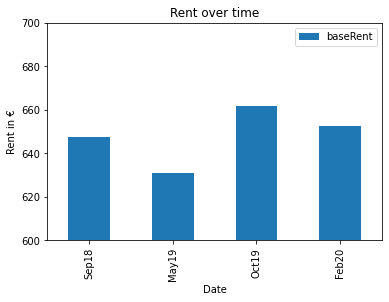

In [166]:


df_mean_base_rent=df_rental_cleaned[['baseRent','date']].groupby(by='date').mean()

custom_order ={'Sep18':0, 'May19':1, 'Oct19':2, 'Feb20':3}
df_mean_base_rent=df_mean_base_rent.sort_values(by=['date'], key=lambda x: x.map(custom_order), ascending=True)


df_mean_base_rent.plot(kind='bar', title= 'Rent over time',xlabel='Date', ylabel='Rent in €', ylim=(600,700))



It seems like rent tend to raise towars the end of the year

<AxesSubplot:title={'center':'Rent over time'}, xlabel='Date', ylabel='Rent in €'>

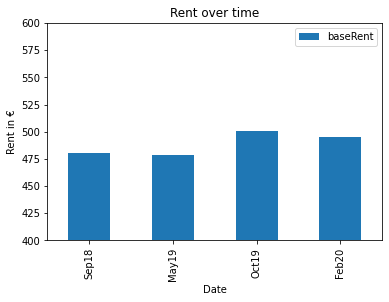

In [167]:
df_mean_base_rent=df_rental_cleaned[['baseRent','date']].groupby(by='date').median()
custom_order ={'Sep18':0, 'May19':1, 'Oct19':2, 'Feb20':3}
df_mean_base_rent=df_mean_base_rent.sort_values(by=['date'], key=lambda x: x.map(custom_order), ascending=True)


df_mean_base_rent.plot(kind='bar', title= 'Rent over time',xlabel='Date', ylabel='Rent in €',ylim=(400,600) )


Having a look at the median rent it seems to rais over time. 

Lets have alook at if the region has an influence on the base rent.

In [168]:
df_rental_cleaned[['geo_bln', 'baseRent']].groupby(by='geo_bln').mean().sort_values(by='baseRent')

,baseRent
geo_bln,
Sachsen_Anhalt,369.170101
Thüringen,388.390176
Mecklenburg_Vorpommern,419.855726
Sachsen,438.193380
Brandenburg,511.723671
Saarland,582.502876
Nordrhein_Westfalen,599.852331
Niedersachsen,599.903172
Bremen,623.018671


Let's check on how other parameters influence the base rent

In [169]:
df_prices_predict = df_rental_cleaned[['baseRent','geo_bln', 'livingSpace', 'picturecount', 'yearConstructed', 'noRooms', 'regio2']]
df_prices_predict.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 268756 entries, 0 to 268849
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   baseRent         268756 non-null  float64
 1   geo_bln          268756 non-null  object 
 2   livingSpace      268692 non-null  float64
 3   picturecount     263788 non-null  float64
 4   yearConstructed  211747 non-null  float64
 5   noRooms          268756 non-null  float64
 6   regio2           268756 non-null  object 
dtypes: float64(5), object(2)
memory usage: 16.4+ MB


In [170]:
df_prices_predict.noRooms.size-np.count_nonzero(df_prices_predict.noRooms)

0

<AxesSubplot:>

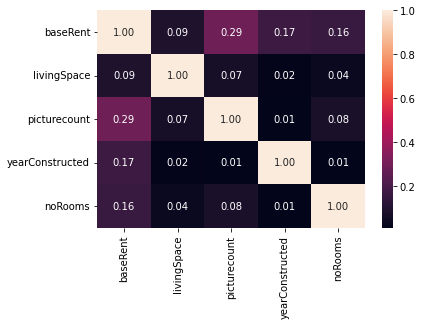

In [171]:
sns.heatmap(df_prices_predict.corr(), annot=True, fmt=".2f")

Interestlingly we have the highest correlation with picture count and base rent as well as balcony. let's see if this is different for different areas. 

<AxesSubplot:>

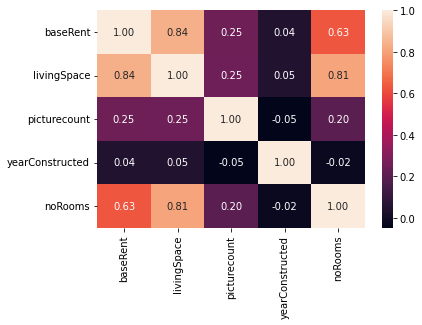

In [172]:
df_hamburg = get_city_or_region(df_prices_predict,'Hamburg' )
sns.heatmap(df_hamburg.corr(), annot=True, fmt=".2f")

<AxesSubplot:>

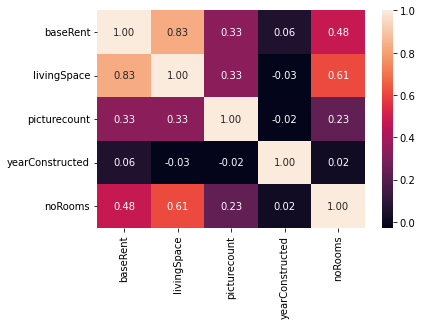

In [173]:
df_Berlin = get_city_or_region(df_prices_predict,'Berlin')
sns.heatmap(df_Berlin.corr(), annot=True, fmt=".2f")

<AxesSubplot:>

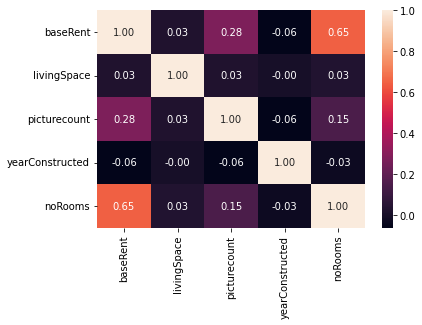

In [180]:
df_munich =df_prices_predict[df_prices_predict.regio2 == 'München']
sns.heatmap(df_munich.corr(), annot=True, fmt=".2f")

Interstlingly there is no strong correlytion between Munich and livingspace whatsoever the number of rooms seem to have an impact

<AxesSubplot:>

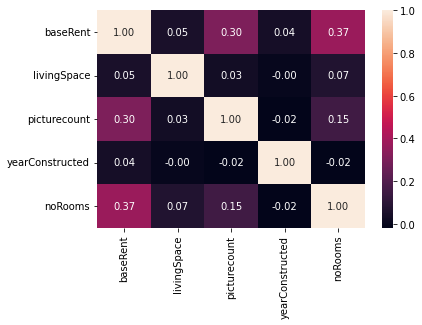

In [175]:
df_bayern = get_city_or_region(df_prices_predict,'Bayern')
sns.heatmap(df_bayern.corr(), annot=True, fmt=".2f")

<AxesSubplot:>

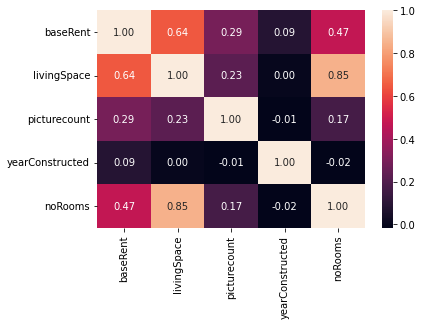

In [176]:
df_bayern_without_munich = df_bayern[df_bayern.regio2 !='München']
sns.heatmap(df_bayern_without_munich.corr(), annot=True, fmt=".2f")